# Szkolenie własnego modelu
Szkolenie odbywa się na podstawie `yolov8n` autorstwa _Ultralytics_

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import cv2

Szkolenie modelu:

(_UWAGA na zmianę ilości epok:\
Z CUDA na GTX 1080 powniższa komórka wykonywała się 50 min_)

In [ ]:
model_config = 'yolov8n.yaml'
dataset_config = 'dataset.yaml'

model = YOLO(model_config)

model.train(data=dataset_config, epochs=10, imgsz=640)

Szybkie sprawdzenie modelu na przykładowych danych:

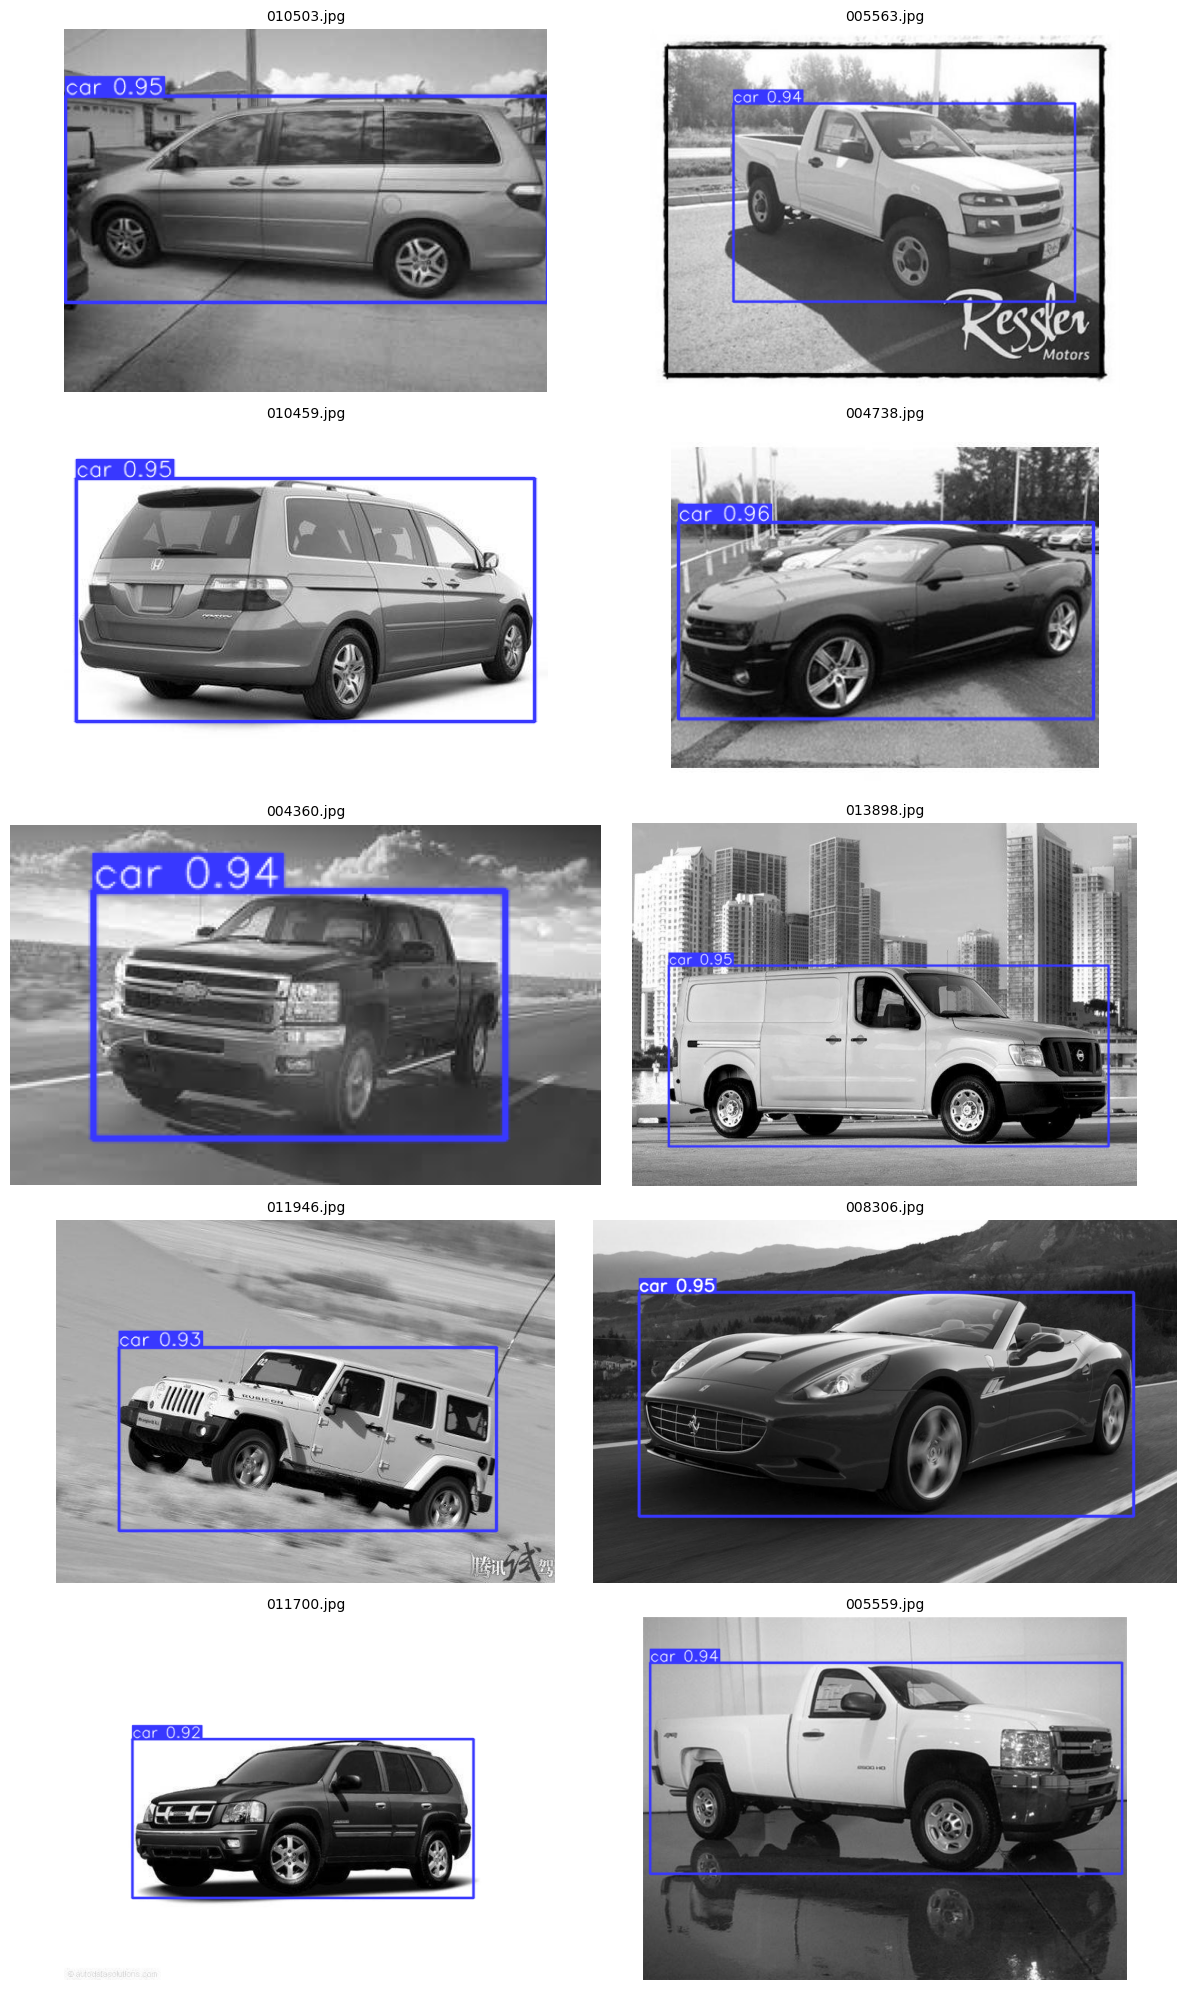

In [21]:
import os
import random

model = YOLO('runs/detect/train3/weights/best.pt') #TODO: Zamienić na najnowszy w razie szkolenia nowego!!!!

image_folder = 'data/valid/images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, min(10, len(image_files)))

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

for idx, img_name in enumerate(random_images):
    img_path = os.path.join(image_folder, img_name)

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model.predict(source=img_rgb, save=False, imgsz=640, conf=0.25, verbose=False)
    pred_img = results[0].plot()

    axes[idx].imshow(pred_img)
    axes[idx].set_title(f'{img_name}', fontsize=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()
